In [2]:
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import umap

In [3]:
df = pd.read_csv("supporting_4.csv")

In [4]:
df

,PCBA1030,PCBA1461,PCBA1468,PCBA1688,PCBA2546,PCBA2551,PCBA504332,PCBA504339,PCBA504444,PCBA504467,...,PCBA686979,PCBA720504,PCBA720579,PCBA720580,PCBA883,PCBA884,PCBA891,PCBA938,SMILES,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,O=C(NC(Nc1ccc(F)cc1)(C(F)(F)F)C(F)(F)F)c1cccnc1,1
1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCC1CN2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C...,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CC(NC(=O)NNC(=O)c1ccncc1)(C(F)(F)F)C(F)(F)F,3
3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CCC(NC(=O)NCc1ccccc1)(C(F)(F)F)C(F)(F)F,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,OC(c1ccccc1)(c1nc(/C=C/c2ccc(C(F)(F)F)cc2)cs1)...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,O=C(NCCNC(=O)c1cc(OCC(F)(F)F)ccc1OCC(F)(F)F)Nc...,1008
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(NCc1cc(C(F)(F)F)ccc1Cl)c1cccc2c1C(=O)c1ccc...,1009
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CCCNc1nc(OCC(F)(F)F)nc(OCC(F)(F)F)n1,1010
1010,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,O=C(Cn1nnc(-c2cccc(C(F)(F)F)c2)n1)NNS(=O)(=O)c...,1011


In [5]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Mol')

In [6]:
def fp_list_from_smiles_list(smiles_list,n_bits=1012):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=1012):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr


In [7]:
fp_list = fp_list_from_smiles_list(df.SMILES)
fp_df = pd.DataFrame(fp_list)

100%|██████████| 1012/1012 [00:00<00:00, 2800.67it/s]


In [8]:
fp_list

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [9]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.0, n_components=2, random_state=42)
crds_embedded = reducer.fit_transform(fp_list)

In [10]:
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])

In [11]:
tsne_df['SMILES'] = df['SMILES']
tsne_df['PCBA1030'] = df['PCBA1030']
tsne_df['PCBA1461'] = df['PCBA1461']
tsne_df['PCBA1468'] = df['PCBA1468']
tsne_df['PCBA1688'] = df['PCBA1688']
tsne_df['PCBA2546'] = df['PCBA2546']
tsne_df['PCBA2551'] = df['PCBA2551']
tsne_df['PCBA504332'] = df['PCBA504332']
tsne_df['PCBA504339'] = df['PCBA504339']
tsne_df['PCBA504444'] = df['PCBA504444']
tsne_df['PCBA504467'] = df['PCBA504467']
tsne_df['PCBA540276'] = df['PCBA540276']
tsne_df['PCBA588855'] = df['PCBA588855']
tsne_df['PCBA624288'] = df['PCBA624288']
tsne_df['PCBA624296'] = df['PCBA624296']
tsne_df['PCBA624417'] = df['PCBA624417']
tsne_df['PCBA651635'] = df['PCBA651635']
tsne_df['PCBA686970'] = df['PCBA686970']
tsne_df['PCBA686978'] = df['PCBA686978']
tsne_df['PCBA686979'] = df['PCBA686979']
tsne_df['PCBA720504'] = df['PCBA720504']
tsne_df['PCBA720579'] = df['PCBA720579']
tsne_df['PCBA720580'] = df['PCBA720580']
tsne_df['PCBA883'] = df['PCBA883']
tsne_df['PCBA884'] = df['PCBA884']
tsne_df['PCBA891'] = df['PCBA891']
tsne_df['PCBA938'] = df['PCBA938']


In [12]:
print('tsne_df=',tsne_df.head())
tsne_df.to_csv('tsne_df.csv',index=False)


tsne_df=           X         Y                                             SMILES  \
0 -3.400807  0.943488    O=C(NC(Nc1ccc(F)cc1)(C(F)(F)F)C(F)(F)F)c1cccnc1   
1  0.119029  4.210483  CCC1CN2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C...   
2 -3.129684  0.655121        CC(NC(=O)NNC(=O)c1ccncc1)(C(F)(F)F)C(F)(F)F   
3 -3.389504  0.425933            CCC(NC(=O)NCc1ccccc1)(C(F)(F)F)C(F)(F)F   
4 -0.701823  1.131113  OC(c1ccccc1)(c1nc(/C=C/c2ccc(C(F)(F)F)cc2)cs1)...   

   PCBA1030  PCBA1461  PCBA1468  PCBA1688  PCBA2546  PCBA2551  PCBA504332  \
0       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
1       0.0       NaN       NaN       NaN       0.0       0.0         NaN   
2       0.0       0.0       0.0       0.0       0.0       0.0         0.0   
3       0.0       0.0       NaN       0.0       0.0       0.0         0.0   
4       NaN       NaN       NaN       NaN       NaN       NaN         NaN   

   ...  PCBA686970  PCBA686978  PCBA686979  PCBA720504  PCBA720579  \
0

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MCS
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

/home/hyuna/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  if sys.path[0] == '':


In [14]:
df = pd.read_csv("tsne_df.csv")

X = df[["X","Y"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [15]:
range_n_clusters = [10]

For n_clusters = 10 The average silhouette_score is : 0.5861700041795281


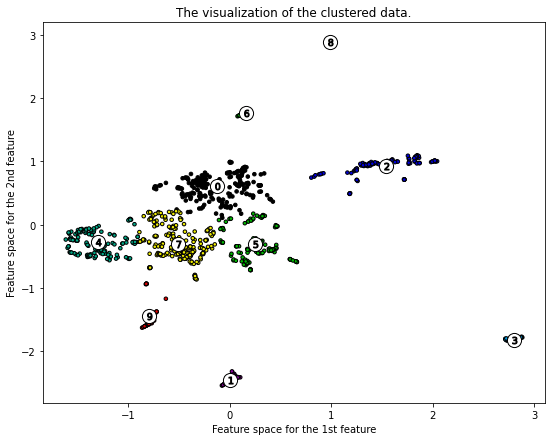

In [16]:
for n_clusters in range_n_clusters:
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=50, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")


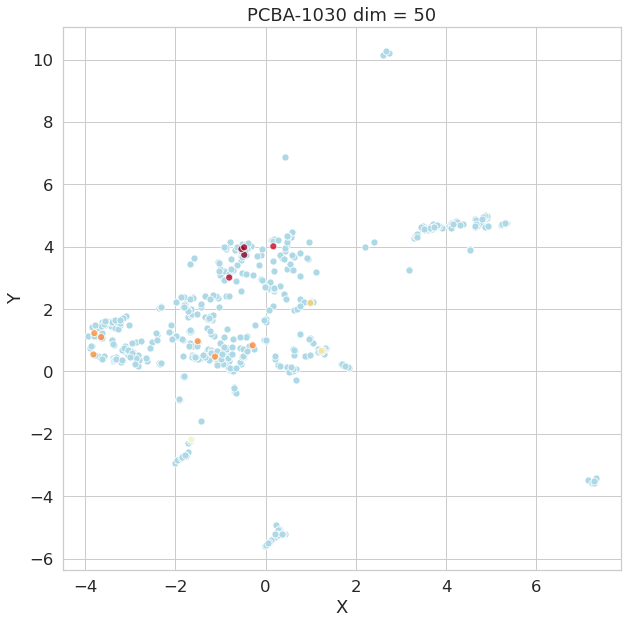

In [17]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


tsne_df = pd.read_csv("tsne_df.csv")

# Generate fake data
x = tsne_df.query("PCBA1030 == 1")["X"]
y = tsne_df.query("PCBA1030 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA1030 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='white',cmap='YlOrRd',alpha=0.8)

plt.title("PCBA-1030 dim = 50")
plt.savefig('1030.png')
plt.show()

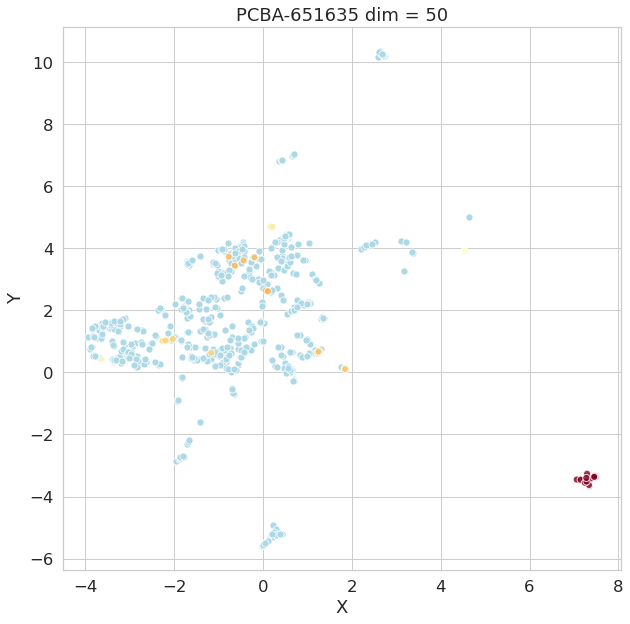

In [18]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


tsne_df = pd.read_csv("tsne_df.csv")

# Generate fake data
x = tsne_df.query("PCBA651635 == 1")["X"]
y = tsne_df.query("PCBA651635 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA651635 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='white',cmap='YlOrRd',alpha=0.8)

plt.title("PCBA-651635 dim = 50")
plt.savefig('651635.png')
plt.show()

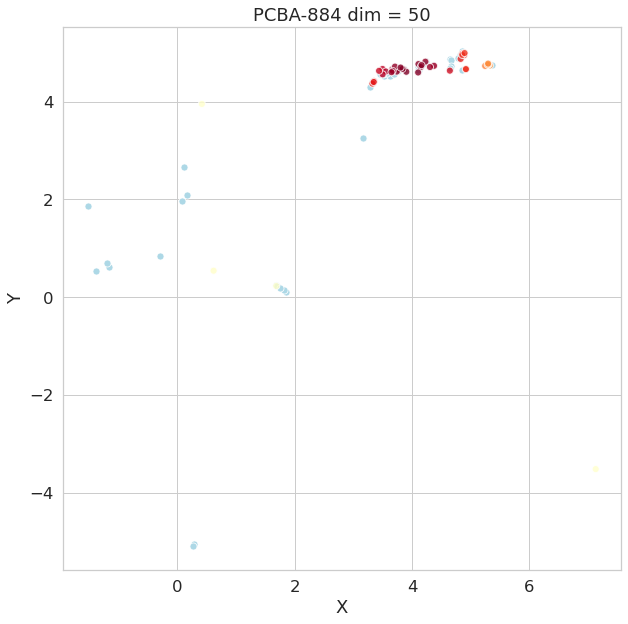

In [19]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


tsne_df = pd.read_csv("tsne_df.csv")

# Generate fake data
x = tsne_df.query("PCBA884 == 1")["X"]
y = tsne_df.query("PCBA884 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA884 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='white',cmap='YlOrRd',alpha=0.8)

plt.title("PCBA-884 dim = 50")
plt.savefig('884.png')
plt.show()

In [20]:
inactive_df = tsne_df.query("PCBA884 == 0")
inactive_df = inactive_df.reset_index(drop=1)

inactive_list = []
for i in range(0,len(inactive_df)):
    m = Chem.MolFromSmiles(inactive_df['SMILES'][i])
    inactive_list.append(m)
    Draw.MolToFile(m,'inactive_png/TEST_%d.png'%i)


In [21]:
active_df = tsne_df.query("PCBA883 == 1")
active_df = active_df.reset_index(drop=1)
active_list = []
for i in range(0,len(active_df)):
    m = Chem.MolFromSmiles(active_df['SMILES'][i])
    active_list.append(m)
    Draw.MolToFile(m,'active_png/TEST_%d.png'%i)

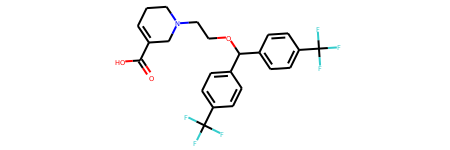

In [22]:
active_list[1]

In [23]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show

output_file("toolbar.html")
active_imgs=[]

for i in range(0,len(active_df)):
    active_imgs.append('./active_png/TEST_%d.png'%i)

inactive_imgs=[]
for i in range(0,len(inactive_df)):
    inactive_imgs.append('./inactive_png/TEST_%d.png'%i)


source_1 = ColumnDataSource(data=dict(
    x_1 = active_df["X"],
    y_1 = active_df["Y"],
    imgs=active_imgs,

#    fonts=[
#        '<i>italics</i>',
#        '<pre>pre</pre>',
#        '<b>bold</b>',
#        '<small>small</small>',
#        '<del>del</del>'
#    ]
))

source_2 = ColumnDataSource(data=dict(
    x_2 = inactive_df["X"],
    y_2 = inactive_df["Y"],
    imgs=inactive_imgs,

#    fonts=[
#        '<i>italics</i>',
#        '<pre>pre</pre>',
#        '<b>bold</b>',
#        '<small>small</small>',
#        '<del>del</del>'
#    ]
))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="160" alt="@imgs" width="160"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
    </div>
"""

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x_2', 'y_2', size=5, source=source_2, color='grey')
p.circle('x_1', 'y_1', size=5, source=source_1, color='red')

show(p)
